# Dataset

For this example, we will be using the [affairs dataset](http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html). 

This dataset was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a [1978 paper](http://fairmodel.econ.yale.edu/rayfair/pdf/1978a200.pdf) from the Journal of Political Economy.

## Description of Variables

The dataset contains 6366 observations of 9 variables:

Field | Description
--- | ---
`rate_marriage` | woman's rating of her marriage (1 = very poor, 5 = very good)
`age` | woman's age
`yrs_married` | number of years married
`children` | number of children
`religious` | woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
`educ` | level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
`occupation` | woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
`occupation_husb` | husband's occupation (same coding as above)
`affairs`| time spent in extra-marital affairs

# EDA Starter

## Import modules

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

## Data Pre-Processing

In [2]:
# load dataset
dta = pd.read_csv("affair_dataset.csv")

# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)

## Data Exploration

In [3]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [4]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [7]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [8]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Text(0, 0.5, 'Frequency')

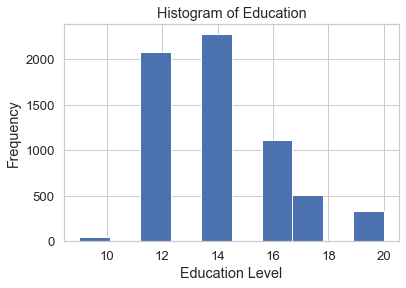

In [9]:
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

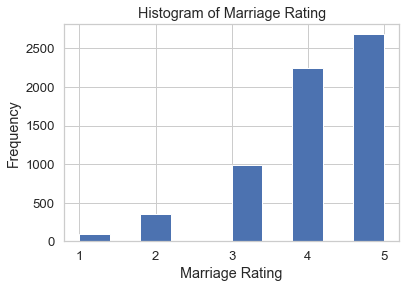

In [10]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

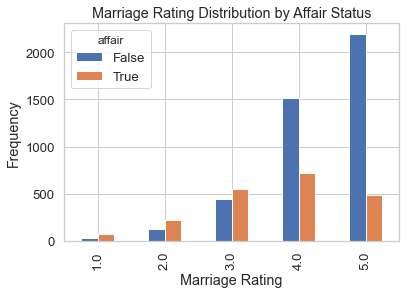

In [11]:
# barplot of marriage rating grouped by affair (True or False)
pd.crosstab(dta.rate_marriage, dta.affair.astype(bool)).plot(kind='bar')
plt.title('Marriage Rating Distribution by Affair Status')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

Text(0, 0.5, 'Percentage')

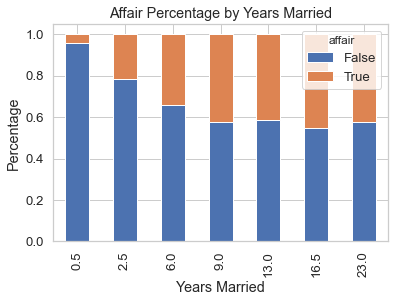

In [12]:
affair_yrs_married = pd.crosstab(dta.yrs_married, dta.affair.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')

# Your Tasks

1. Train at least two different classification models (more if you can!). See how well you can do in terms of AUC (on the test set).

2. "Combine" the predictions of (at least) two different models in an "ensemble". Try different methods of combining the results.  Can you make a combination that works better than either of your components?

3. Engineer a new feature and see if you can improve your AUC.

4. Report the best AUC you were able to achieve (on the test set), and propose your final model design.

# Ethical Considerations: 
* Statements about types of women rather than context of relationships. Religiousness, education etc. We would have to be really careful and make sure we prove staitstical significance of each feature before including it. 
* Potential impact: women reading teh findings in a magazine say and noticing that they fall into the "sterotype" of women who cheat -> the power of suggestion planting the idea that tye would or should cheat, based on their self or relationship satisfaction. 
* Problematic publishing: the longer you're married the more likely you are to end up cheating no matter how good your relationship is. 
* General statement: problematic to publish feature relationships or non-anonymized info about people who answered survey. 
* Who would be using this data? In what ways could it be pushlished maliciously? 
* Engineered features: 
    * ratio of woman's education to husbands education
    * how long they were married before having kids? 
    * one hot encoded education rather than the random linear relationship
* Even best model with best AUC i.e. separability between women who cheat and don't cheat even further divides based on those features that may not be true to the general population. Having some ambiguity might actually be better than the absolute highest AUC because you don't really *want* a hard a fast classification of "this person will cheat" based on certain characteristics. It leaves out so much nuance in who they are and what their relationship is and the fact that they *shouldn't* cheat on their partner. PUublishing those results, as I've outlined above, might make people who have those characteristics feel doomed in their marriange and doomed to cheat. 
* Dystopian future: have to answer these types of questions routinely about your marriage and they use the model to predict your likelihood of cheating/breaking up, and getting denied for instance a mortgage based on that. 
* Once a model is published, the nuance might be lost, but people will believe the model's result because its "science", and may be believed *over* the word of the actual person saying they didn't have an affair. 